In [1]:
import pandas as  pd
import numpy as np
pd.set_option('display.max_rows', 500)

# Data Understanding

sources
 John Hopkins (GITHUB) https://github.com/CSSEGISandData/COVID-19
 
 rki, webscraping https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html
 
 REST API services to retreive data www.smartable.ai

# John Hopkins GITHUB

In [2]:
pd_raw=pd.read_csv(r"C:\Users\LATITUDE\ads_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [4]:
time_idx = pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Brazil',
    ]

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [10]:
#df_plot

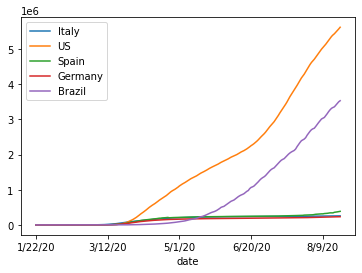

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type of Date

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,Brazil
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [13]:
from datetime import datetime

In [14]:
df_plot.date[0]

'1/22/20'

In [15]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [16]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] #convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [17]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df_plot.head()

,date,Italy,US,Spain,Germany,Brazil
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [38]:
df_plot.to_csv(r'C:\Users\LATITUDE\ads_covid-19\data\processed\COVID_small_flat_table.csv',sep=';',index=False)

# Relational Data

In [20]:
pd_raw=pd.read_csv(r"C:\Users\LATITUDE\ads_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")

In [21]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [30]:
pd_relational_model=pd_raw.rename(columns={'Country/Region':'country',
                                   'Province/State':'state',
                                   })

In [31]:
pd_relational_model=pd_relational_model.drop(['Lat','Long'],axis=1)
pd_relational_model.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,0,0,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [32]:
test_pd=pd_relational_model.set_index(['state','country']).T

In [33]:
test_pd.columns

MultiIndex([(                           nan,         'Afghanistan'),
            (                           nan,             'Albania'),
            (                           nan,             'Algeria'),
            (                           nan,             'Andorra'),
            (                           nan,              'Angola'),
            (                           nan, 'Antigua and Barbuda'),
            (                           nan,           'Argentina'),
            (                           nan,             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                           nan,      'United Kingdom'),
            (                           nan,             'Uruguay'),
            (                           nan,          'Uzbekistan'),
            (                           nan,           'Venezuela'),
            (     

In [37]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
96271,8/21/20,Zhejiang,West Bank and Gaza,18313.0
96272,8/21/20,Zhejiang,Western Sahara,10.0
96273,8/21/20,Zhejiang,Yemen,1906.0
96274,8/21/20,Zhejiang,Zambia,10627.0
